# Assignment 2
The objective of this assignment is to introduce you to function specific neural networks. In otherwords, we will try and design neural networks based on insights from existing optimization algorithms. In the process, you will realize that while deep neural networks can, in theory, be generalized to learn arbitrary functions, design choices determine how easily and quickly they are able to learn those functions.

Additionally, when the training process starts, the model has to learn a particular mapping with no prior hint about the kind of function it is looking for. By introducing a structure which correlates to optimization objectives, neural networks can effectively be helped in narrowing done the choice of functions and parameters to be learnt.

### Imports

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import torch
import pickle
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader

# from google.colab import drive

np.random.seed(0)
gen = torch.Generator().manual_seed(0)

c:\Users\Khanz\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [3]:
# drive.mount('/content/drive')

# Task 1: Sparsity and Robustness

Please add your solution to this task from the manual in the cells below.

In [2]:
x = np.array([1, 1, 1, 6, 1, 1])

alpha = 0.05
num_iters=100
lam=0.001
z_initial=1

In [3]:
def L2_Loss(x,z):
  loss=0
  for reading in x:
    loss+=(reading-z)**2
  return loss

def L2_grad(x,z):
  return -2 * (x - z)

def L2_min(x,z):
  z_new=z
  for i in range(num_iters):
    for reading in x:
      grad=L2_grad(reading,z_new)
      z_new-=alpha*grad
    if (i+1)%10==0:
      print(f'Value of z at iteration {i+1}: {z_new}')
      print(f'Loss Value: {L2_Loss(x,z_new)}')

  return z_new


z_l2=L2_min(x,z_initial)

print(f"z value for L2 loss: {z_l2}")
print(f"Loss value: {L2_Loss(x,z_l2)}")

Value of z at iteration 10: 1.8627989449109603
Loss Value: 20.838542666927204
Value of z at iteration 20: 1.8643494035017207
Loss Value: 20.83910531298547
Value of z at iteration 30: 1.864352189691778
Loss Value: 20.839106350032047
Value of z at iteration 40: 1.8643521946985901
Loss Value: 20.839106351895715
Value of z at iteration 50: 1.8643521947075874
Loss Value: 20.839106351899066
Value of z at iteration 60: 1.8643521947076032
Loss Value: 20.839106351899073
Value of z at iteration 70: 1.8643521947076032
Loss Value: 20.839106351899073
Value of z at iteration 80: 1.8643521947076032
Loss Value: 20.839106351899073
Value of z at iteration 90: 1.8643521947076032
Loss Value: 20.839106351899073
Value of z at iteration 100: 1.8643521947076032
Loss Value: 20.839106351899073
z value for L2 loss: 1.8643521947076032
Loss value: 20.839106351899073


In [4]:
def L1_Loss(x,z):
  loss=0
  for reading in x:
    loss+=abs(reading-z)
  return loss

def L1_minimizer(x,z):
  z_new=z
  for i in range(num_iters):
    for reading in x:
      l1=0
      if (reading-z)>0:
        l1=1
      elif (reading-z)<0:
        l1=-1
      z_new=z_new-lam*(l1)
    if (i+1)%10==0:
      print(f'Value of z at iteration {i+1}: {z_new}')
      print(f'Loss Value: {L1_Loss(x,z_new)}')
  return z_new

z_l1=L1_minimizer(x,z_initial)

print(f"z value for L1 loss: {z_l1}")
print(f"Loss value: {L1_Loss(x,z_l1)}")

Value of z at iteration 10: 0.99
Loss Value: 5.06
Value of z at iteration 20: 0.98
Loss Value: 5.119999999999999
Value of z at iteration 30: 0.97
Loss Value: 5.180000000000001
Value of z at iteration 40: 0.96
Loss Value: 5.24
Value of z at iteration 50: 0.95
Loss Value: 5.3
Value of z at iteration 60: 0.94
Loss Value: 5.360000000000001
Value of z at iteration 70: 0.9299999999999999
Loss Value: 5.420000000000001
Value of z at iteration 80: 0.9199999999999999
Loss Value: 5.48
Value of z at iteration 90: 0.9099999999999999
Loss Value: 5.54
Value of z at iteration 100: 0.8999999999999999
Loss Value: 5.6
z value for L1 loss: 0.8999999999999999
Loss value: 5.6


In [5]:
def L0_Loss(x,z):
    return np.sum((x - z) != 0)

def L0_minimizer(x):
  values, counts = np.unique(x, return_counts=True)
  max_idx = np.argmax(counts)
  z_new = values[max_idx]
  return z_new

z_l0=L0_minimizer(x)

print(f"z value for L0 loss: {z_l0}")
print(f"Loss value: {L0_Loss(x,z_l0)}")

z value for L0 loss: 1
Loss value: 1


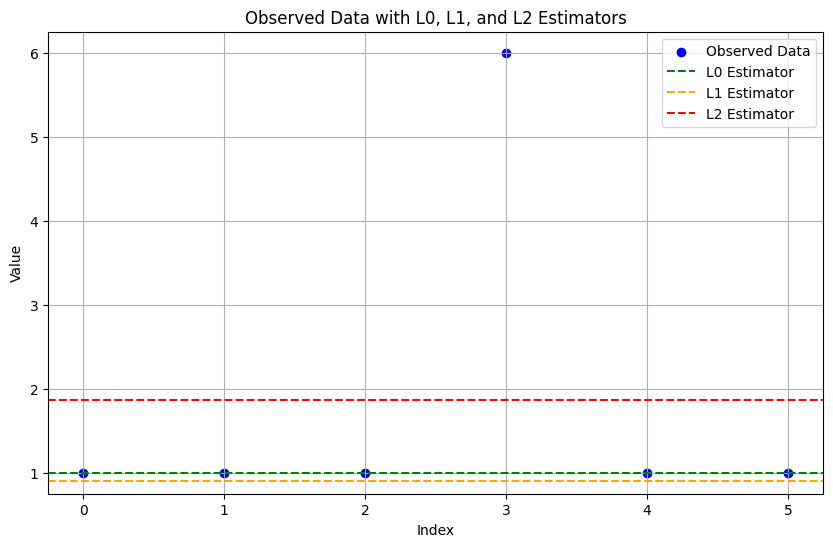

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(x)), x, color='blue', label='Observed Data')
plt.axhline(y=z_l0, color='green', linestyle='--', label='L0 Estimator')
plt.axhline(y=z_l1, color='orange', linestyle='--', label='L1 Estimator')
plt.axhline(y=z_l2, color='red', linestyle='--', label='L2 Estimator')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Observed Data with L0, L1, and L2 Estimators')
plt.legend()
plt.grid(True)
plt.show()

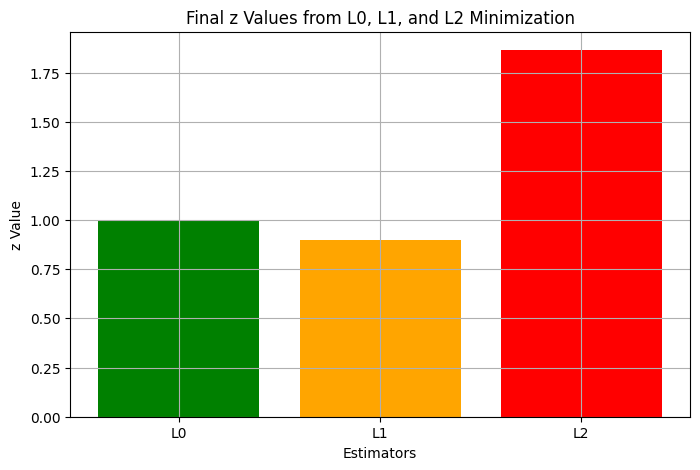

In [7]:
z_values = [z_l0, z_l1, z_l2]
estimators = ['L0', 'L1', 'L2']
plt.figure(figsize=(8, 5))
plt.bar(estimators, z_values, color=['green', 'orange', 'red'])
plt.xlabel('Estimators')
plt.ylabel('z Value')
plt.title('Final z Values from L0, L1, and L2 Minimization')
plt.grid(True)
plt.show()

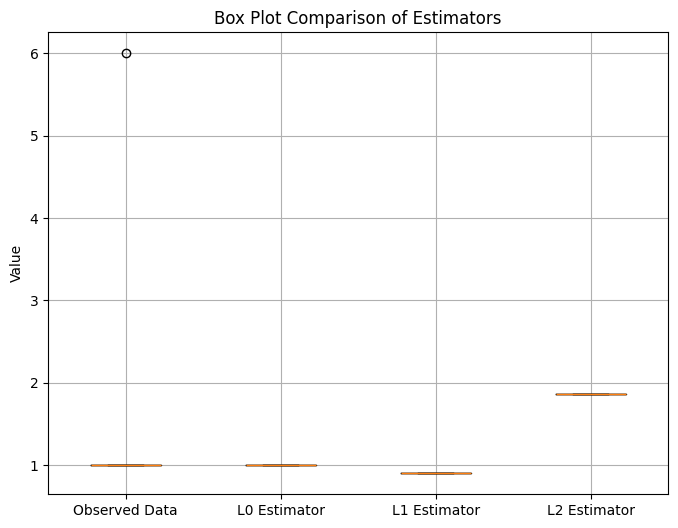

In [8]:
plt.figure(figsize=(8, 6))
plt.boxplot([x, [z_l0] * len(x), [z_l1] * len(x), [z_l2] * len(x)], 
            labels=['Observed Data', 'L0 Estimator', 'L1 Estimator', 'L2 Estimator'])
plt.ylabel('Value')
plt.title('Box Plot Comparison of Estimators')
plt.grid(True)
plt.show()

# Task 2: Sparsity in Contrastive Models

Please add your solution to this task from the manual in the cells below.

In [11]:
def get_data_loaders_cifar10(batch_size=64):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    train_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)
    test_dataset = CIFAR10(root='./data', train=False, download=True, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)

    return train_loader, test_loader, 10

train,test,num_classes=get_data_loaders_cifar10()

In [ ]:
pip install git+https://github.com/openai/CLIP.git

In [ ]:
import clip

device = "cuda" if torch.cuda.is_available() else "cpu"

# loading the model
model, preprocess = clip.load("ViT-B/32", device=device)


# CIFAR-10 class labels
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create text embeddings for each class label
text_inputs = torch.cat([clip.tokenize(f"a photo of a {c}") for c in cifar10_classes]).to(device)

with torch.no_grad():
    z_txt = model.encode_text(text_inputs)

print("Text embedding shape:", z_txt.shape)  # Check the shape of the embeddings


def zero_shot(image_embed,text_embed):
  # Compute cosine similarity between image and text embeddings
    image_embed1=image_embed
    text_embed1=text_embed
    image_embed1 /= image_embed1.norm(dim=-1, keepdim=True)
    text_embed1 /= text_embed1.norm(dim=-1, keepdim=True)

    similarities = (image_embed1 @ text_embed1.T).squeeze(0)  # Cosine similarity
    pred = similarities.argmax(dim=1)  # Get index of the most similar class

    return pred

def accuracy_zero_shot(predicted_class):
  # find accuracy
    correct=0
    total=0
    for i in range(len(predicted_class)):
      if cifar10_classes[predicted_class[i].item()]==cifar10_classes[label[i].item()]:
        correct+=1
      total+=1
    acc=correct/total

    return acc


# Get a batch of data (image and label)
for batch in train:
    image, label = batch  # batch contains images and labels
    # image_preprocessed = preprocess(image[0]).unsqueeze(0).to(device)  # Preprocess the image and add batch dimension

    # Generate image embedding using the CLIP model
    with torch.no_grad():
        z_img = model.encode_image(image)

    print("Image embedding shape:",z_img.shape)  # Check the shape of the embedding

    pred_dense=zero_shot(z_img,z_txt)
    dense_acc=accuracy_zero_shot(pred_dense)



    print(f"Dense Accuracy: {dense_acc}")
    break  # Stop after the first batch for testing

In [ ]:
# Define the concept dictionary A
concept_dict = {}
for c in cifar10_classes:
    concept_dict[c] = model.encode_text(clip.tokenize(f"a photo of a {c}")).squeeze(0)

# Create a matrix A with concept embeddings as columns
A = torch.stack(list(concept_dict.values())).T

print(A.shape)

In [ ]:
# Center and normalize the image and concept embeddings
z_c = z_img - z_img.mean(dim=0)
A_c = A - A.mean(dim=0)

z_c = z_c / z_c.norm(dim=-1, keepdim=True)
A_c = A_c / A_c.norm(dim=-1, keepdim=True)

print (A_c.shape)
print (z_c.shape)

In [ ]:
def soft_thresholding(x, tau):
    return torch.sign(x) * torch.maximum(torch.abs(x) - tau, torch.tensor(0.0, device=x.device))

def ista(z_c, A_c, lam=0.001, alpha=100, max_iter=100):

    # Initialize w
    w = torch.zeros((z_c.shape[0], A_c.shape[1]), device=z_c.device)

    for i in range(max_iter):
        #Compute gradient of the L2 loss
        l2_grad_w = -1* (z_c - w @ A_c.T) @ A_c

        #Gradient descent step
        w = w - (1/alpha) * l2_grad_w

        #Soft-thresholding to enforce sparsity
        w = soft_thresholding(w, (lam/2*alpha))

    return w

w=ista(z_c, A_c, lam=0.001, alpha=200, max_iter=100)


# Reconstruct the sparse representation
z_hat_img=w @ A_c.T + z_c.mean(dim=0)

In [ ]:
# Compute cosine similarity between sparse representation and text embeddings
pred_sparse=zero_shot(z_hat_img,z_txt)
sparse_acc=accuracy_zero_shot(pred_sparse)
print(f"Sparse Accuracy: {sparse_acc}")

In [ ]:
import sys

# Evaluate zero-shot classification performance
print(f"Dense Accuracy: {dense_acc}")
print(f"Sparse Accuracy: {sparse_acc}")

# Plot relationship between sparsity and classification accuracy
sparsity_levels = [0.0001, 0.001, 0.01, 0.1, 1]
accuracies = []
for sparsity in sparsity_levels:
    sparse_embeddings_sparsity = z_hat_img*(z_hat_img > sparsity)
    pred_sparse1=zero_shot(sparse_embeddings_sparsity,z_txt)
    accuracy=accuracy_zero_shot(pred_sparse1)
    accuracies.append(accuracy)
plt.plot(sparsity_levels, accuracies)
plt.xlabel("Sparsity Level")
plt.ylabel("Accuracy")
plt.title("Accuracy Compared to Level of Sparsity")

# Compare memory footprint of dense and sparse embeddings
dense_memory_footprint = sys.getsizeof(z_img)
sparse_memory_footprint = sys.getsizeof(z_hat_img.detach())
print(f"Dense memory footprint: {dense_memory_footprint} bytes")
print(f"Sparse memory footprint: {sparse_memory_footprint} bytes")

# Analyze sparse embeddings to identify most active concepts
concept_activations = z_hat_img.sum(dim=0)
top_concepts = concept_activations.argsort()[:10]
print(f"Top concepts: {top_concepts}")

# Task 3: ISTA for Sparse Vector Recovery

## Section 1: Optimization

We first start by considering a well formulated problem:

Consider some noisy observations $\mathbf{x} \in \mathbb{R}^{m}$ generated from the following process:

$$
\begin{align}
\mathbf{x} = \mathbf{Az} + \mathbf{n}
\end{align}
$$

where $\mathbf{z} \in \mathbb{R}^{m}$ is our target signal, $\mathbf{A} \in \mathbb{R}^{m \times n}$ is a linear operator representing the process by which the signal has been measured, and $\mathbf{n} \in \mathbb{R}^{n}$ represents additive noise. Our objective is to recover $\mathbf{x}$.


This can be formulated as an optimization problem as follows:
$$
\begin{align}
\min_{\mathbf{z}} ||\mathbf{x} - \mathbf{Az}||_{2}^{2}
\end{align}
$$

This is the well known, least squares regression problem and there are various methods to solve it. We make our problem more interesting by adding the constraint that $\mathbf{x}$ is **sparse**. Noting that the $l_{0}$ norm measures sparsity, our new optimization problem is:

$$
\begin{align}
\min_{\mathbf{z}} ||\mathbf{x} - \mathbf{Az}||_{2}^{2} + \lambda||\mathbf{z}||_{0}
\end{align}
$$

This problem is **not** convex and hence cannot be solved using conventional gradient based methods.

We relax the $l_{0}$ norm to the $l_{1}$ norm in order to bring our problem in the domain of convex problems:

$$
\begin{align}
\min_{\mathbf{z}} ||\mathbf{x} - \mathbf{Az}||_{2}^{2} + \lambda||\mathbf{z}||_{1}
\end{align}
$$

You may know this as lasso regression. Note that this problem is not solvable via gradient descent since the $l_{1}$ norm is not differentiable. Many solvers exist for this problem, but we shall take a different approach known as the **Iterative Soft Thresholding Algorithm (ISTA)**.

We can write our optimization objective as a sum of two functions:

$$
\begin{align}
\min_{\mathbf{z}}{h(\mathbf{z}) = f(\mathbf{z}) + g(\mathbf{z})}
\end{align}
$$

where $f$ is convex and differentiable while $g$ is convex but not necessarily differentiable.

Note that if $g$ was differentiable, we could use a gradient based approach (e.g. gradient descent) to minimize it. Our approach is to design an iterative algorithm such that at iteration $k$ where the algorithm is at point $\mathbf{z}_k$, we minimize another convex function $m_{k}$ fulfilling the following conditions:

$$
\begin{align}
m_{k}(\mathbf{z}) &\geq h(\mathbf{z}) \; \; ∀ \mathbf{z} \\
m_{k}(\mathbf{z}_{k}) &= h(\mathbf{z}_{k})
\end{align}
$$

Our update equation then becomes:
$$
\begin{align}
\mathbf{z}_{k+1} = \min_{\mathbf{z}}{m_{k}({\mathbf{z}})}
\end{align}
$$

Coming back to our problem, we define the following function:
$$
\begin{align}
m_{k}(\mathbf{z}) = ||\mathbf{x} - \mathbf{Az}||_{2}^{2} + λ||\mathbf{z}||_{1} + (\mathbf{z} - \mathbf{z}_{k})^{T}(α\mathbf{I} - \mathbf{A}^{T}\mathbf{A})(\mathbf{x} - \mathbf{z}_{k})
\end{align}
$$

Note that at $\mathbf{z} = \mathbf{z}_{k}$, the additional quadratic term becomes 0 while for all other $\mathbf{z}$, the additional term is positive as long as $α > \max(\text{eig}(\mathbf{A}^{T}\mathbf{A}))$ thereby satisfying the two conditions defined above. Each iterative step that minimizes this function, also minimizes the original objective function.
The expression for $\min_{\mathbf{z}}m_{k}(\mathbf{z}_{k})$ can be written as follows:

$$
\begin{align}
\min_{\mathbf{z}}{||\mathbf{z}_{k} + \frac{1}{\alpha}\mathbf{A}^{T}(\mathbf{x} - \mathbf{A}\mathbf{z}_{k}) - \mathbf{z}||_{2}^{2} + \frac{λ}{\alpha}||\mathbf{z}||_{1}}
\end{align}
$$
While an exact solution for the miniimzation problem does not exist, by finding a minimizer at each $k$, we can approach the global minimizer of the original problem.

Each update iteration looks as follows:
$$
\begin{align}
\mathbf{z}_{k+1} = \text{soft}(\mathbf{z}_{k} + \frac{1}{\alpha}\mathbf{A}(\mathbf{x} - \mathbf{A}^{T}\mathbf{z}_{k}), \frac{\lambda}{2\alpha})
\end{align}
$$

Where:
$$
\begin{align}
\text{soft}(\mathbf{x}, \tau) := \text{sign}(\mathbf{x})\max(0, |\mathbf{x}| - \tau)
\end{align}
$$

The soft thresholding operator is also known as the proximal gradient operator for the $l_{1}$ norm.

Consider the following example where $\mathbf{z} \in \mathbb{R}^{100}$,  $\mathbf{A} \in \mathbb{R}^{100 \times 100}$ and $\mathbf{n} \sim \mathcal{N}(0, 0.05^{2}\mathbf{I}) \in \mathbb{R}^{100}$:

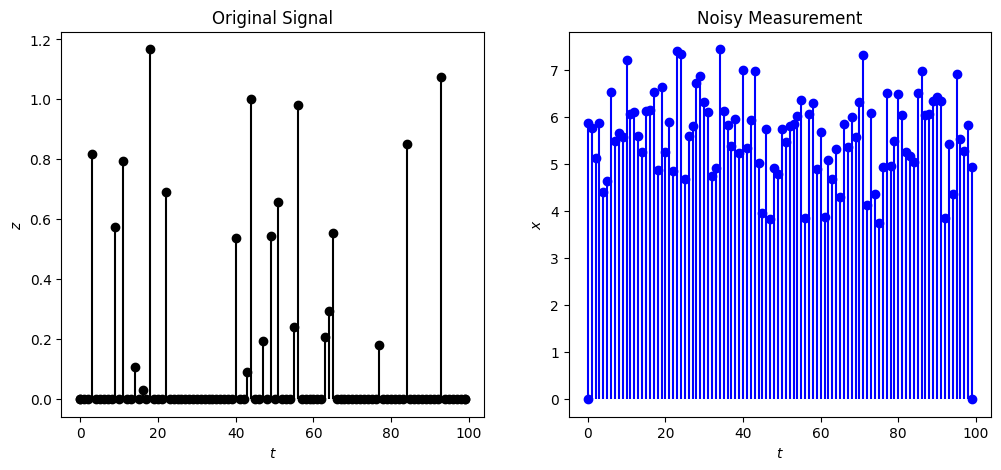

In [4]:
t = np.arange(0, 100, 1)
z = 1.5 * np.random.rand(len(t))
z = z * np.array([0 if np.random.rand() < 0.8 else 1 for i in range(len(t))])

A = np.random.rand(100, 100)

sigma = 0.05
noise = np.random.normal(0, sigma)
x = A @ z + noise


fig = plt.figure(1, dpi=100, figsize=(12, 5))
ax  = fig.subplots(nrows=1, ncols=2)
_   = ax[0].stem(t, z, "k", basefmt="ko")
_   = ax[0].set_xlabel(r'$t$')
_   = ax[0].set_ylabel(r'$z$')
_   = ax[0].set_title("Original Signal")

_   = ax[1].stem(t, x, "b", basefmt="bo")
_   = ax[1].set_xlabel(r'$t$')
_   = ax[1].set_ylabel(r'$x$')
_   = ax[1].set_title("Noisy Measurement")

### Task 3.1:

Implement the ISTA class for a fixed number of iterations. For the given signal, plot the total loss and sparse loss as a function of iterations. Also plot the recovered and original signals on a $2 \times 1$ grid.

In [5]:
# class ISTA:
#     def __init__(self, lambd: float, max_iter=1000):
#         """Initialize the ISTA algorithm parameters."""
#         self.lambd = lambd
#         self.max_iter = max_iter
#         self.loss_history_reconstruction = []
#         self.loss_history_sparse = []
#         self.loss_history_combined = []

#     def _soft(self, z: np.ndarray, T: float) -> np.ndarray:
#         """Apply soft-thresholding to the input vector."""
#         pass  # To be implemented

#     def _run_one_iter(self, z: np.ndarray, x: np.ndarray, A: np.ndarray, alpha: float):
#         """Run one iteration of the ISTA algorithm."""
#         pass  # To be implemented

#     def optimize(self, A: np.ndarray, x: np.ndarray, alpha: float) -> np.ndarray:
#         """Optimize the solution using the ISTA algorithm."""
#         pass  # To be implemented

#     def visualize_loss_history(self):
#         """Visualize the loss history over the iterations."""
#         pass  # To be implemented


import numpy as np
import matplotlib.pyplot as plt

class ISTA:
    def __init__(self, lambd: float, max_iter=1000):
        """Initialize the ISTA algorithm parameters."""
        self.lambd = lambd
        self.max_iter = max_iter
        self.loss_history_reconstruction = []
        self.loss_history_sparse = []
        self.loss_history_combined = []

    def _soft(self, z: np.ndarray, T: float) -> np.ndarray:
        """Apply soft-thresholding to the input vector."""
        return np.sign(z) * np.maximum(0, np.abs(z) - T)

    def _run_one_iter(self, z: np.ndarray, x: np.ndarray, A: np.ndarray, alpha: float):
        """Run one iteration of the ISTA algorithm."""
        # Compute the gradient step
        grad_step = z + (1 / alpha) * A.T @ (x - A @ z)
        # Soft thresholding with lambda
        z_new = self._soft(grad_step, self.lambd / (2 * alpha))
        
        # Calculate losses
        reconstruction_loss = np.linalg.norm(x - A @ z_new, 2) ** 2
        sparsity_loss = self.lambd * np.linalg.norm(z_new, 1)
        combined_loss = reconstruction_loss + sparsity_loss
        
        return z_new, reconstruction_loss, sparsity_loss, combined_loss

    def optimize(self, A: np.ndarray, x: np.ndarray, alpha: float) -> np.ndarray:
        """Optimize the solution using the ISTA algorithm."""
        # Initialize z to zeros
        z = np.zeros(A.shape[1])
        
        for _ in range(self.max_iter):
            z, reconstruction_loss, sparsity_loss, combined_loss = self._run_one_iter(z, x, A, alpha)
            
            # Store the losses for plotting
            self.loss_history_reconstruction.append(reconstruction_loss)
            self.loss_history_sparse.append(sparsity_loss)
            self.loss_history_combined.append(combined_loss)
        
        return z

    def visualize_loss_history(self):
        """Visualize the loss history over the iterations."""
        plt.figure(figsize=(10, 6))
        plt.plot(self.loss_history_reconstruction, label='Reconstruction Loss')
        plt.plot(self.loss_history_sparse, label='Sparsity Loss')
        plt.plot(self.loss_history_combined, label='Combined Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss History')
        plt.legend()
        plt.show()

    def visualize_signals(self, original_z, recovered_z):
        """Visualize the original and recovered signals."""
        t = np.arange(len(original_z))
        fig, ax = plt.subplots(1, 2, figsize=(12, 5))

        ax[0].stem(t, original_z, "k", basefmt="ko")
        ax[0].set_title("Original Signal")
        ax[0].set_xlabel(r'$t$')
        ax[0].set_ylabel(r'$z$')

        ax[1].stem(t, recovered_z, "b", basefmt="bo")
        ax[1].set_title("Recovered Signal")
        ax[1].set_xlabel(r'$t$')
        ax[1].set_ylabel(r'$z$')

        plt.show()


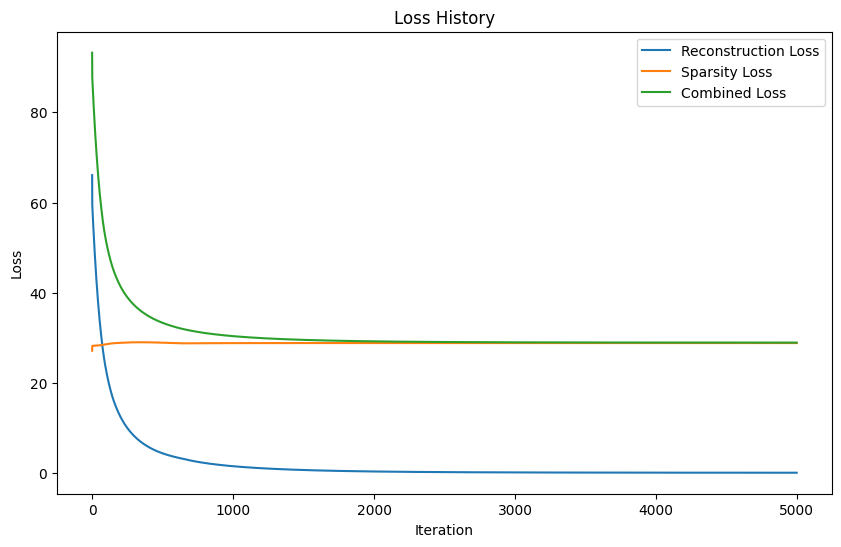

In [6]:
opt = ISTA(2.5, max_iter=5000)
eigs, _ = np.linalg.eig(A.T @ A)
alpha = max(eigs) + 100
z_recovered = opt.optimize(A, x, alpha)
opt.visualize_loss_history()

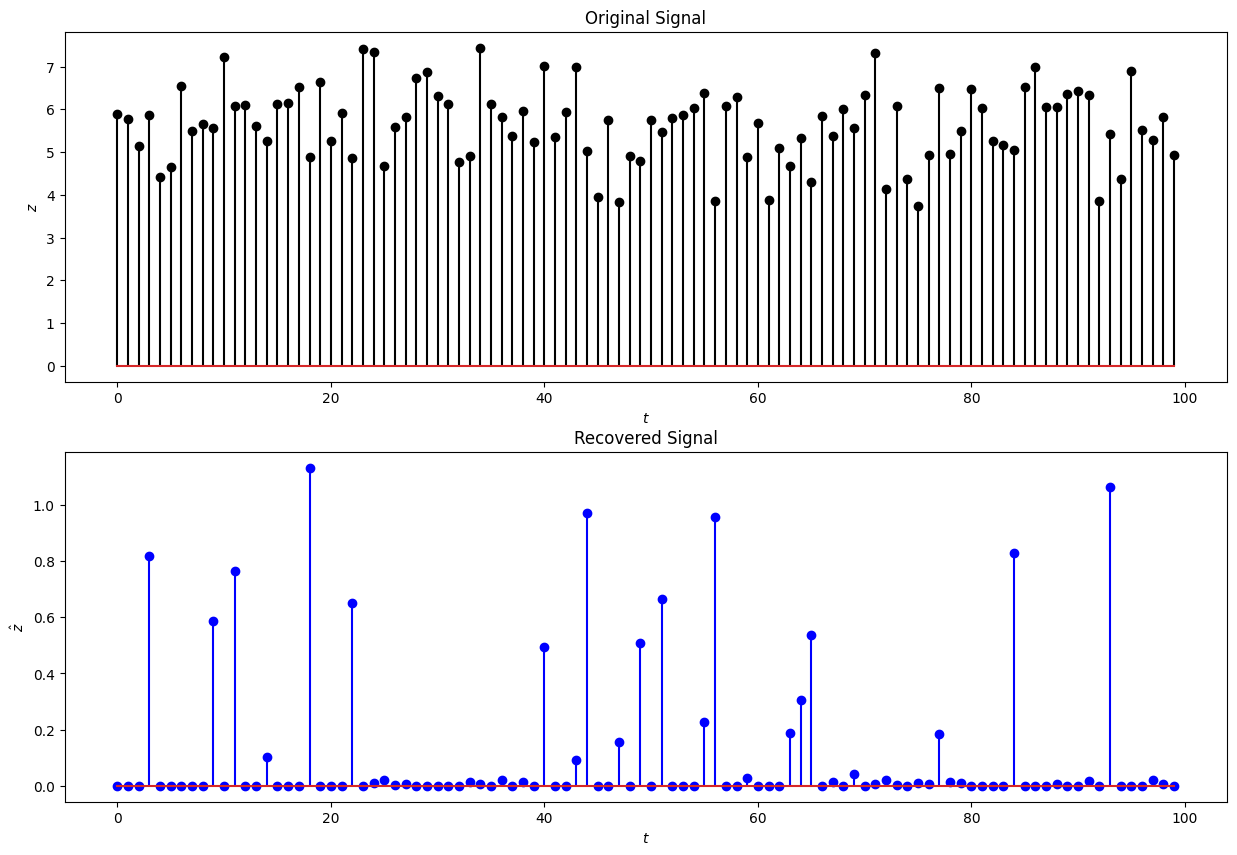

In [7]:
fig = plt.figure(dpi=100, figsize=(15, 10))
ax  = fig.subplots(2, 1)
_   = ax[0].stem(t, x, "k", label="Original Signal")
_   = ax[0].set_xlabel(r'$t$')
_   = ax[0].set_ylabel(r'$z$')
_   = ax[0].set_title("Original Signal")

_   = ax[1].stem(t, z_recovered, "b", label="Recovered Signal")
_   = ax[1].set_xlabel(r'$t$')
_   = ax[1].set_ylabel(r'$\hat{z}$')
_   = ax[1].set_title("Recovered Signal")

### Task 3.2

Add in your response to Task 3.2 from the manual in the cells below.

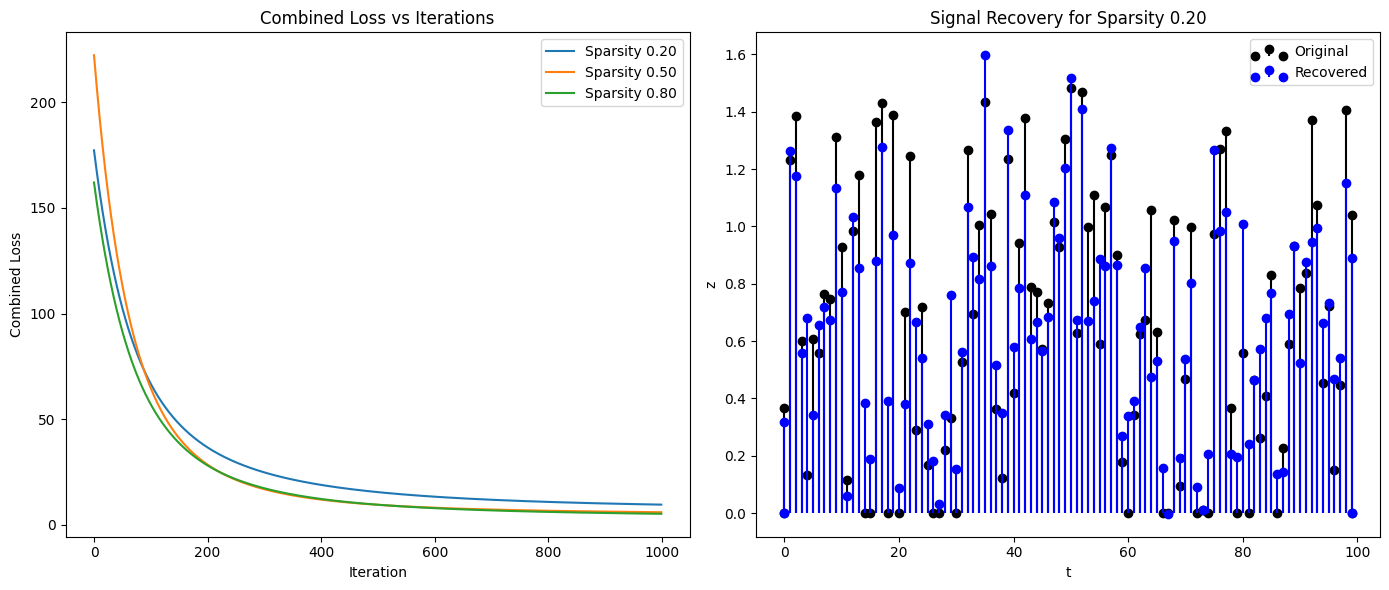

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ISTA class from earlier is assumed to be implemented here

def generate_sparse_signal(length, sparsity_level):
    """
    Generate a sparse signal with a given sparsity level.
    sparsity_level is the fraction of zero elements (e.g., 0.8 means 80% zeros).
    """
    z = 1.5 * np.random.rand(length)
    z = z * np.array([0 if np.random.rand() < sparsity_level else 1 for _ in range(length)])
    return z

def run_experiments(sparsity_levels, signal_length, A, noise_sigma, lambd, max_iter=1000):
    """
    Run ISTA for signals with different sparsity levels and compare results.
    """
    alpha = np.max(np.linalg.eigvals(A.T @ A))  # Estimate alpha
    results = {}

    for sparsity_level in sparsity_levels:
        # Generate a sparse signal with the given sparsity level
        z = generate_sparse_signal(signal_length, sparsity_level)

        # Generate noisy observation
        noise = np.random.normal(0, noise_sigma, size=signal_length)
        x = A @ z + noise

        # Initialize and run ISTA
        ista = ISTA(lambd=lambd, max_iter=max_iter)
        recovered_z = ista.optimize(A, x, alpha)

        # Store the results for analysis
        results[sparsity_level] = {
            'original_z': z,
            'recovered_z': recovered_z,
            'loss_history_reconstruction': ista.loss_history_reconstruction,
            'loss_history_combined': ista.loss_history_combined
        }
    
    return results

def visualize_experiment_results(results):
    """
    Visualize the results for different sparsity levels.
    """
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    for sparsity_level, result in results.items():
        # Plot loss history for different sparsity levels
        ax[0].plot(result['loss_history_combined'], label=f'Sparsity {sparsity_level:.2f}')
    
    ax[0].set_title('Combined Loss vs Iterations')
    ax[0].set_xlabel('Iteration')
    ax[0].set_ylabel('Combined Loss')
    ax[0].legend()

    sparsity_level_to_visualize = sorted(results.keys())[0]  # Choose the sparsest signal for visualization
    t = np.arange(len(results[sparsity_level_to_visualize]['original_z']))

    # Visualize the original and recovered signal for a specific sparsity level
    ax[1].stem(t, results[sparsity_level_to_visualize]['original_z'], "k", basefmt="ko", label='Original')
    ax[1].stem(t, results[sparsity_level_to_visualize]['recovered_z'], "b", basefmt="bo", label='Recovered')
    ax[1].set_title(f'Signal Recovery for Sparsity {sparsity_level_to_visualize:.2f}')
    ax[1].set_xlabel('t')
    ax[1].set_ylabel('z')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

# Example usage
sparsity_levels = [0.2, 0.5, 0.8]  # Test with different sparsity levels (20%, 50%, and 80% zeros)
signal_length = 100
A = np.random.rand(signal_length, signal_length)
noise_sigma = 0.05
lambd = 0.1
max_iter = 1000

# Run experiments
results = run_experiments(sparsity_levels, signal_length, A, noise_sigma, lambd, max_iter)

# Visualize the results
visualize_experiment_results(results)


## Section 2: Unfolding

In section 1, we had the luxury of knowing what our measurement matrix $A$ was. Yet, we had to choose values of $\alpha$ and $\lambda$ manually and a little experimentation will show you that their choice impacts the performance of the algorithm greatly. Our new problem setup assumes that we only have access to some noisy measurements $\mathbf{z}$ and our objective is to recover the underlying sparse signal $\mathbf{z}$ with no knowledge of $\mathbf{A}$.

To do so, we turn our attention towards neural networks.


The following code will help you load and create a dataset from the given `sparse_signals.pkl` file. Do not change it.

The training data comprises of 9000 input $\mathbf{z} \in \mathbb{R}^{100}$ and output $\mathbf{x} \in \mathbb{R}^{100}$ signal pairs while test set contains 1000 samples.

In [9]:
class SparseSignalsDataset(Dataset):
  def __init__(self, Z, X):
    self.z = torch.tensor(np.array(Z), dtype=torch.float32)
    self.x = torch.tensor(np.array(X), dtype=torch.float32)

  def __len__(self):
    return len(self.z)

  def __getitem__(self, idx):
    return self.z[idx], self.x[idx]

In [10]:
def load_file(filename='signals.pkl'):
    with open(filename, 'rb') as f:
        Z, X = pickle.load(f)
    return Z, X

In [11]:
# DO NOT MODIFY
filename = "/Users/hashmat/Desktop/nii/sparse_signals.pkl"
Z, X = load_file(filename=filename)
dataset = SparseSignalsDataset(Z, X)

batch_size = 32

train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size  # 20% for testing

train_dataset, test_dataset = random_split(dataset, [train_size, test_size], generator=gen)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, generator=gen)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

### Task 3.3

Refer to the manual for this task.

In [12]:
def visualize(model, test_loader, num_samples, configs):
  model.eval()
  fig = plt.figure(figsize=(12, 5))
  axs = fig.subplots(2, num_samples)
  t = np.arange(0, 100, 1)
  with torch.no_grad():
    for i, (z, x) in enumerate(test_loader):
      if i == num_samples:
        break
      z, x = z.to(configs["device"]), x.to(configs["device"])
      z_hat = model(x)[0, :].cpu().numpy()
      z = z[0, :].cpu().numpy()
      _   = axs[0, i].stem(t, z, "k")
      _   = axs[0, i].set_xlabel(r'$t$')
      _   = axs[0, i].set_ylabel(r'$z$')
      _   = axs[0, i].set_title("Original Signal")

      _   = axs[1, i].stem(t, z_hat, "b")
      _   = axs[1, i].set_xlabel(r'$t$')
      _   = axs[1, i].set_ylabel(r'$\hat{z}$')
      _   = axs[1, i].set_title("Recovered Signal")
  plt.tight_layout()
  plt.show()
  return axs

In [13]:
# Ignore the use of x, y here - those are just placeholders

def train(model, train_loader, loss_fn, optimizer, configs):
  model.train()
  for epoch in range(configs["epochs"]):
    running_loss = 0.0
    for x, y in train_loader:
      x, y = x.to(configs["device"]), y.to(configs["device"])
      optimizer.zero_grad()
      x_hat = model(y)
      loss = loss_fn(x_hat, x)
      loss.backward()
      optimizer.step()
      running_loss += loss.item() * y.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch: [{epoch+1}/{configs['epochs']}], Loss: {epoch_loss:.4f}")
    print(f"Threshold after epoch {epoch+1}: {model_unfolded.layers[0].threshold.item()}")

def evaluate(model, test_loader, loss_fn, configs, tol=1e-6):
  model.eval()
  running_loss = 0.0
  sparsities = []
  with torch.no_grad():
    for x, y in test_loader:
      x, y = x.to(configs["device"]), y.to(configs["device"])
      x_hat = model(y)
      loss = loss_fn(x_hat, x)
      running_loss += loss.item() * y.size(0)
      sparsities.append(torch.sum(torch.abs(x_hat) < tol).item()/x_hat.numel())
  avg_loss = running_loss / len(test_loader.dataset)
  avg_sparsity = np.mean(sparsities)
  print(f"Test Loss: {avg_loss:.4f}")
  print(f"Average Sparsity: {avg_sparsity:.4f}")
  return avg_loss, avg_sparsity

In [14]:
# class ISTABlock(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         """Initialize the ISTA block with a learnable threshold and a linear layer."""
#         super().__init__()
#         pass  # To be implemented

#     def _soft(self, x, T):
#         """Apply soft-thresholding with threshold T."""
#         pass  # To be implemented

#     def forward(self, x):
#         """Perform the forward pass through the ISTA block."""
#         pass  # To be implemented


# class UnfoldedNN(nn.Module):
#     def __init__(self, configs):
#         """Initialize the unfolded neural network with multiple ISTA blocks."""
#         super().__init__()
#         pass  # To be implemented

#     def forward(self, x):
#         """Perform the forward pass through the unfolded neural network."""
#         pass  # To be implemented


class ISTABlock(nn.Module):
    def __init__(self, input_dim, output_dim):
        """Initialize the ISTA block with a learnable threshold and a linear layer."""
        super().__init__()
        self.linear = nn.Linear(input_dim, output_dim)
        self.threshold = nn.Parameter(torch.tensor(0.1))  # Learnable threshold

    def _soft(self, x, T):
        """Apply soft-thresholding with threshold T."""
        return torch.sign(x) * torch.maximum(torch.abs(x) - T, torch.zeros_like(x))

    def forward(self, x):
        """Perform the forward pass through the ISTA block."""
        z = self.linear(x)
        return self._soft(z, self.threshold)

class UnfoldedNN(nn.Module):
    def __init__(self, configs):
        """Initialize the unfolded neural network with multiple ISTA blocks."""
        super().__init__()
        self.num_layers = configs.get("num_layers", 5)
        self.input_dim = configs["input_dim"]
        self.output_dim = configs["output_dim"]
        
        self.layers = nn.ModuleList([
            ISTABlock(self.input_dim, self.output_dim)
            for _ in range(self.num_layers)
        ])

    def forward(self, x):
        """Perform the forward pass through the unfolded neural network."""
        for layer in self.layers:
            x = layer(x)
        return x


In [15]:
configs_unfolded = {
    "input_dim": 100,
    "hidden_dims": [256, 256],
    "output_dim": 100,
    "lr": 1e-4,
    "epochs": 30,
    "batch_size": 32,
    "device": "cuda" if torch.cuda.is_available() else "cpu"
}

In [16]:
model_unfolded = UnfoldedNN(configs_unfolded).to(configs_unfolded["device"])
optimizer = Adam(model_unfolded.parameters(), lr=configs_unfolded["lr"])
L1 = nn.L1Loss()
train(model=model_unfolded, train_loader=train_loader, loss_fn=L1, optimizer=optimizer, configs=configs_unfolded)



Epoch: [1/30], Loss: 0.1502
Threshold after epoch 1: 0.10451805591583252
Epoch: [2/30], Loss: 0.1499
Threshold after epoch 2: 0.10506795346736908
Epoch: [3/30], Loss: 0.1499
Threshold after epoch 3: 0.10527273267507553
Epoch: [4/30], Loss: 0.1499
Threshold after epoch 4: 0.10537892580032349
Epoch: [5/30], Loss: 0.1499
Threshold after epoch 5: 0.10540531575679779
Epoch: [6/30], Loss: 0.1498
Threshold after epoch 6: 0.1051691547036171
Epoch: [7/30], Loss: 0.1496
Threshold after epoch 7: 0.10097603499889374
Epoch: [8/30], Loss: 0.1488
Threshold after epoch 8: 0.087887704372406
Epoch: [9/30], Loss: 0.1480
Threshold after epoch 9: 0.07377392053604126
Epoch: [10/30], Loss: 0.1473
Threshold after epoch 10: 0.05950866639614105
Epoch: [11/30], Loss: 0.1465
Threshold after epoch 11: 0.04694117605686188
Epoch: [12/30], Loss: 0.1457
Threshold after epoch 12: 0.03273690119385719
Epoch: [13/30], Loss: 0.1448
Threshold after epoch 13: 0.019282227382063866
Epoch: [14/30], Loss: 0.1439
Threshold after 

Test Loss: 0.1367
Average Sparsity: 0.9653


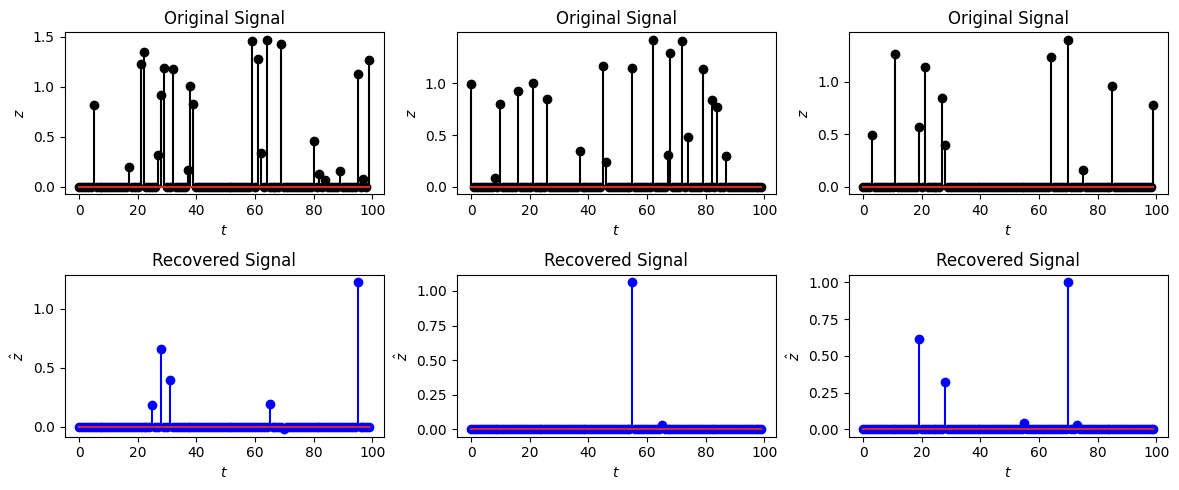

In [17]:
avg_eval_loss_unfolded, avg_eval_sparsity_unfolded = evaluate(model_unfolded, test_loader, L1, configs_unfolded)
_ = visualize(model_unfolded, test_loader, 3, configs_unfolded)

### Task 3.4

Add in your solution to Task 3.4 from the manual in the cells below.

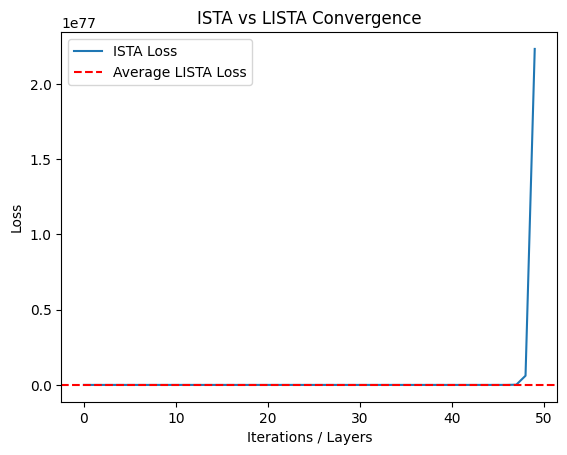

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

def ista(A, z, alpha, lambd, num_iters=50):
    """ISTA implementation for a given measurement matrix A, input z, alpha, and lambda."""
    x = np.zeros_like(z)
    losses = []
    for _ in range(num_iters):
        grad = A.T @ (A @ x - z)
        x = x - alpha * grad
        x = np.sign(x) * np.maximum(np.abs(x) - alpha * lambd, 0)  # Soft-thresholding
        loss = np.linalg.norm(A @ x - z, 2)
        losses.append(loss)
    return x, losses

# Generate synthetic sparse signal z
def generate_sparse_signal(dim, sparsity):
    z = np.zeros(dim)
    non_zero_indices = np.random.choice(dim, size=sparsity, replace=False)
    z[non_zero_indices] = np.random.randn(sparsity)
    return z

# Compare ISTA and LISTA
def compare_ista_vs_lista(A, z, alpha, lambd, num_iters, lista_model, test_loader, configs):
    # ISTA
    _, ista_losses = ista(A, z, alpha, lambd, num_iters=num_iters)

    # LISTA (already trained)
    lista_losses = []
    lista_model.eval()  # Ensure the model is in evaluation mode
    with torch.no_grad():  # Disable gradient tracking for inference
        for z_batch, x_batch in test_loader:
            z_batch, x_batch = z_batch.to(configs["device"]), x_batch.to(configs["device"])
            z_hat = lista_model(x_batch)
            # Use L2 loss for consistency with ISTA
            loss = nn.functional.mse_loss(z_hat, z_batch).item()  # MSE loss
            lista_losses.append(loss)

    # Average LISTA loss across batches
    avg_lista_loss = np.mean(lista_losses)
    
    # Plot losses
    plt.plot(ista_losses, label="ISTA Loss")
    plt.axhline(y=avg_lista_loss, color='r', linestyle='--', label="Average LISTA Loss")
    plt.xlabel('Iterations / Layers')
    plt.ylabel('Loss')
    plt.title('ISTA vs LISTA Convergence')
    plt.legend()
    plt.show()

# Example setup
dim = 100
sparsity = 10
np.random.seed(0)  # Set seed for reproducibility
A = np.random.randn(dim, dim)
z = generate_sparse_signal(dim, sparsity)

# Run comparison
# Ensure model_unfolded and test_loader are defined and trained before this point
compare_ista_vs_lista(A, z, alpha=0.1, lambd=0.01, num_iters=50, lista_model=model_unfolded, test_loader=test_loader, configs=configs_unfolded)


# Task 4: ISTA Extension to Matrices and Inclusion of Rank Constraints

So far, we have been working with vectors and sparsity constraints. We now introduce two new challenges:

1. Introducing rank constraints into our problem formulation.
2. Extending our algorithms to matrices (can be used to deal with images, videos etc.)

Note that the rank of a matrix describes the degree of correlation between its rows or columns. A low rank means that most of its rows or columns are similar. In the context of images, a low rank component could be used to represent a background (e.g. a grassy background would have large regions of highly similar pixel values). In the context of videos (assume that each frame is being treated as a vector of dimension $hw$ (height $\times$ width) so that the columns of a matrix represent each frame), a low rank component could represent similarities between successive frames. In other words, such an approach could help us identify constant features and isolating things that change. This is used frequently in medical imaging techniques to isolate outliers from largely similar video/image frames that show blood or tissue.

Mathematically, the rank of a matrix can be captured by the nuclear norm of a matrix $||\mathbf{M}||_{*}$ which basically counts the number of non-zero singular values of $\mathbf{M}$.
The singular values are the non zero elements of the diagonal matrix $\mathbf{\Sigma}$ in the singular value decomposition (SVD) of $\mathbf{M} = \mathbf{U \Sigma V}^{T}$.

Our problem is that we are given some observation $\mathbf{X} \in \mathbb{R}^{a \times b}$ (an image or a video for example) and our objective is to recover a low rank component $\mathbf{L} \in \mathbb{R}^{a \times b}$ and sparse component $\mathbf{S} \in \mathbb{R}^{a \times b}$ such that $\mathbf{X} = \mathbf{AL} + \mathbf{BS}$ where $\mathbf{A}$ and $\mathbf{B}$ represent some linear operations (this is similar to $\mathbf{A}$ in the original least squares regression problem. Also note that in many cases it may be sufficient to for these to be identity matrices, but we shall generalize our formulation). Overall, our optimization problem is:

$$
\begin{align}
\arg \min_{\mathbf{L, S}}{\lambda_{1}||\mathbf{L}||_{*} + \lambda_{2}||\mathbf{S}||_{1} + ||\mathbf{X} - \mathbf{AL} - \mathbf{BS}||_{F}^{2}}
\end{align}
$$

This is also known as Robust Principal Component Analysis (RPCA).

Without going into more details here, the ISTA approach can be extended to this problem formulation via the following two update equations:

$$
\begin{align}
\mathbf{L}_{k+1} &= \text{svt}(
(\mathbf{I} - \frac{1}{L_f} \mathbf{A}^T \mathbf{A}) \mathbf{L}_k - \mathbf{A}^T \mathbf{B} \mathbf{S}_k + \mathbf{A}^T \mathbf{X}, \frac{\lambda_1}{L_f}) \\
\mathbf{S}_{k+1} &= \text{soft}((\mathbf{I} - \frac{1}{L_f} \mathbf{B}^T \mathbf{B}) \mathbf{S}_k - \mathbf{B}^T \mathbf{A} \mathbf{L}_k + \mathbf{B}^T \mathbf{X}, \frac{\lambda_2}{L_f})
\end{align}
$$

You have already seen the soft thresholding operator, the singular value thresholding operator is the proximal gradient operator for the nuclear norm and is defined as follows:

$$
\begin{align}
\text{svt}(\mathbf{X}, \kappa) := \mathbf{U} \, \max(\mathbf{0}, \mathbf{\Sigma} - \kappa\mathbf{I}) \, \mathbf{V}^T
\end{align}
$$

where $\mathbf{U \Sigma V}^{T} = \text{SVD}(\mathbf{X})$

Our focus is not on the details of this optimization algorithm. We shall instead focus on designing a neural network inspired by it.

Note that for each update equation, we can replace the multiplicative matrices by learnable convolutional kernels and thresholds by learnable parameters so that each iteration (layer) looks as follows:

$$
\begin{align}
\mathbf{L}_{k+1} &= \text{svt}(C_{1}^{k} * \mathbf{L}_{k} + C_{2}^{k} * \mathbf{S}_{k} + C_{3}^{k} * \mathbf{X}, \mu_{1})\\
\mathbf{S}_{k+1} &= \text{soft}(K_{1}^{k} * \mathbf{L}_{k} + K_{2}^{k} * \mathbf{S}_{k} + K_{3}^{k} * \mathbf{X}, \mu_{2})
\end{align}
$$

where $C_{i}^{k}$ is the $i^\text{th}$ convolutional kernel of layer $k$ in the $\mathbf{L}$ network and $K_{i}^{k}$ is the $i^\text{th}$ convolutional kernel of layer $k$ in the $\mathbf{S}$ network.

You will be working with the moving MNIST dataset for this problem. Each sample $\mathbf{X} \in \mathbb{R}^{64 \times 64}$ represents a frame from a video containing two mnist digits superimposed on a noisy, low rank background. The functions given below will help you load and visualize the dataset.

In [19]:
class MovingMNISTDataset(Dataset):
    def __init__(self, L, S, X):
        self.L = torch.tensor(np.array(L), dtype=torch.float32)
        self.S = torch.tensor(np.array(S), dtype=torch.float32)
        self.X = torch.tensor(np.array(X), dtype=torch.float32)

        self.L = self.L.view(10, 1000, 64 * 64).permute(1, 2, 0)
        self.S = self.S.view(10, 1000, 64 * 64).permute(1, 2, 0)
        self.X = self.X.view(10, 1000, 64 * 64).permute(1, 2, 0)

        self.L = self.L.unsqueeze(1)
        self.S = self.S.unsqueeze(1)
        self.X = self.X.unsqueeze(1)

        print("L shape:", self.L.shape)
        print("S shape:", self.S.shape)
        print("X shape:", self.X.shape)

    def __len__(self):
        return self.L.size(0)

    def __getitem__(self, idx):
        L_seq = self.L[idx]
        S_seq = self.S[idx]
        X_seq = self.X[idx]

        return L_seq, S_seq, X_seq


In [20]:
def load_mnist(filename='moving_mnist.pkl'):
    with open(filename, 'rb') as f:
        L, S, X = pickle.load(f)
    return L, S, X

In [21]:
# DO NOT MODIFY
filename = "/Users/hashmat/Desktop/nii/moving_mnist.pkl"
L, S, X = load_mnist(filename=filename)
dataset = MovingMNISTDataset(L, S, X)

batch_size = 32

train_size = int(0.8 * len(dataset))  # 80% for training
test_size = len(dataset) - train_size  # 20% for testing

train_dataset, test_dataset = random_split(dataset, [train_size, test_size], generator=gen)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, generator=gen)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

L shape: torch.Size([1000, 1, 4096, 10])
S shape: torch.Size([1000, 1, 4096, 10])
X shape: torch.Size([1000, 1, 4096, 10])


Original X shape: (10000, 64, 64)
Original L shape: (10000, 64, 64)
Original S shape: (10000, 64, 64)
Original X shape: (10000, 64, 64)
Original L shape: (10000, 64, 64)
Original S shape: (10000, 64, 64)

Plots for Original


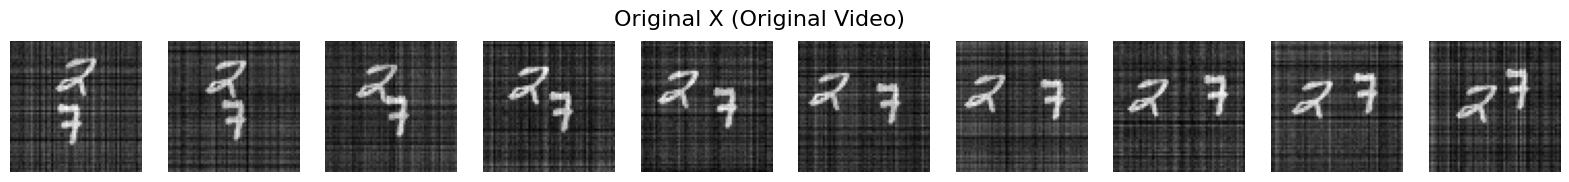

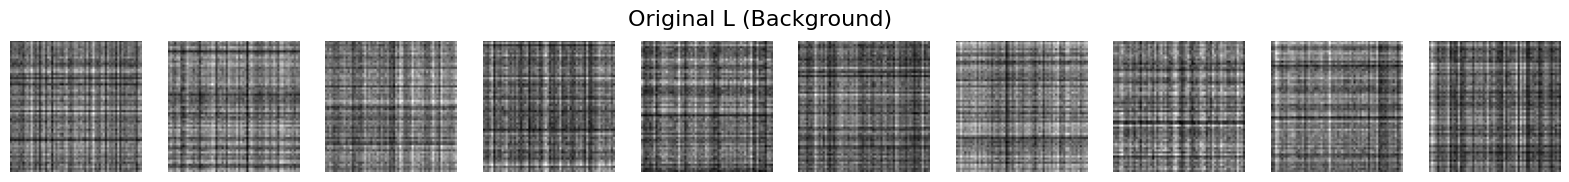

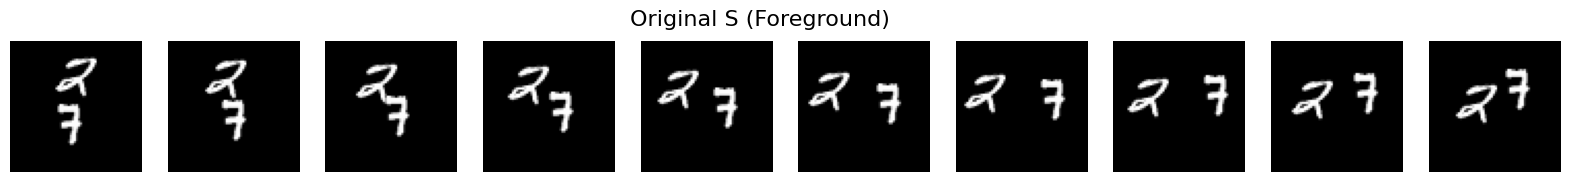



Transformed L_new shape: torch.Size([1, 4096, 10])
Transformed S_new shape: torch.Size([1, 4096, 10])
Transformed X_new shape: torch.Size([1, 4096, 10])


In [22]:
# Display the shape of original data (X)
print("Original X shape:", X.shape)
print("Original L shape:", L.shape)
print("Original S shape:", S.shape)

# Plot the first video frames of original X, L, and S
# Display the shape of original data (X)
print("Original X shape:", X.shape)
print("Original L shape:", L.shape)
print("Original S shape:", S.shape)

# Plot the first video frames of original X, L, and S
def plot_video_frames(data, title):
    video_idx = 0  # Selecting the first video (or frame, since there is no video sequence)
    
    # Directly access the first frame for all sequences
    frames = data[video_idx:video_idx+10]  # Take the first 10 frames
    
    # Create a figure with 10 subplots (one for each frame)
    fig, axs = plt.subplots(1, 10, figsize=(20, 2))
    fig.suptitle(title, fontsize=16)

    for i in range(10):
        axs[i].imshow(frames[i], cmap='gray')
        axs[i].axis('off')

    plt.show()

# Plot original X, L, and S
print("\nPlots for Original")
plot_video_frames(X, "Original X (Original Video)")
plot_video_frames(L, "Original L (Background)")
plot_video_frames(S, "Original S (Foreground)")

# Simulating transformation via the dataset
# L_new, S_new, X_new represent transformed data after the dataloader
L_new, S_new, X_new = dataset[0]  # Dataset returns transformed tensors

# Display the shape of transformed data (L_new, S_new, X_new)
print("\n")
print("Transformed L_new shape:", L_new.shape)
print("Transformed S_new shape:", S_new.shape)
print("Transformed X_new shape:", X_new.shape)


Now design a neural network with up to 5 layers based on the intuition for low rank and sparse solutions developed above. Each layer should contain two branches for performing proximal operations for the low rank and sparse component respectively.

During training, plot the following:
1. MSE Loss as a function of the number of epochs.
2. Final values of learnt thresholding parameters for the L and S brances as a function of layer number.

For the test data, plot the following two charts by averaging over all points:
1. Low Rank:
  - 3D plot showing layer number and index of singular value on the x and y axes and the singular values themselves on the z axis.

2. Sparse:
  - 2D plot showing layer number on the x axis and number of sparse values on the y axis.

In [23]:
# class ISTABlock(nn.Module):
#     def __init__(self, branch, kernel_size=3):
#         """Initialize the ISTA block with a convolution layer and a learnable threshold."""
#         super(ISTABlock, self).__init__()
#         pass  # To be implemented

#     def _soft(self, X, thr):
#         """Apply soft-thresholding to the input tensor."""
#         pass  # To be implemented

#     def _svt(self, X, thr):
#         """Apply Singular Value Thresholding (SVT) to the input tensor."""
#         pass  # To be implemented

#     def forward(self, X):
#         """Perform the forward pass through the ISTA block based on the branch type."""
#         pass  # To be implemented


# class UnfoldedDNN(nn.Module):
#     def __init__(self, configs):
#         """Initialize the unfolded neural network with ISTA blocks for both 'S' and 'L' branches."""
#         super(UnfoldedDNN, self).__init__()
#         pass  # To be implemented

#     def get_thresholds(self):
#         """Return the thresholds from both branches of the network."""
#         pass  # To be implemented

#     def forward(self, D):
#         """Perform the forward pass through the unfolded neural network and return activations."""
#         pass  # To be implemented


import torch
import torch.nn as nn
import torch.nn.functional as F

class ISTABlock(nn.Module):
    def __init__(self, branch, kernel_size=3):
        super(ISTABlock, self).__init__()
        self.branch = branch
        self.conv = nn.Conv2d(1, 1, kernel_size, padding=kernel_size//2, bias=False)
        self.threshold = nn.Parameter(torch.tensor(0.1))
    
    def _soft(self, X, thr):
        return torch.sign(X) * F.relu(torch.abs(X) - thr)
    
    def _svt(self, X, thr):
        # Reshape X to (N*H, W) for SVD
        N, C, H, W = X.shape
        X_reshaped = X.view(N * C, H * W)  # Reshape to 2D

        # Apply SVD
        U, S, V = torch.svd(X_reshaped)
        S = F.relu(S - thr)
        
        # Reconstruct the matrix and reshape back to (N, C, H, W)
        return (torch.mm(torch.mm(U, torch.diag(S)), V.t())).view(N, C, H, W)

    
    def forward(self, X):
        Y = self.conv(X)
        if self.branch == 'S':
            return self._soft(Y, self.threshold)
        elif self.branch == 'L':
            return self._svt(Y, self.threshold)
        else:
            raise ValueError("Branch must be either 'S' or 'L'")

class UnfoldedDNN(nn.Module):
    def __init__(self, configs):
        super(UnfoldedDNN, self).__init__()
        self.layers = nn.ModuleList()
        for _ in range(configs["num_layers"]):
            self.layers.append(nn.ModuleDict({
                'S': ISTABlock('S', configs["kernel_size"]),
                'L': ISTABlock('L', configs["kernel_size"])
            }))
    
    def get_thresholds(self):
        thresholds_S = [layer['S'].threshold.item() for layer in self.layers]
        thresholds_L = [layer['L'].threshold.item() for layer in self.layers]
        return thresholds_S, thresholds_L
    
    def forward(self, D):
        S = torch.zeros_like(D)
        L = torch.zeros_like(D)
        activations_S = []
        activations_L = []
        
        for layer in self.layers:
            S = layer['S'](D - L + S)
            L = layer['L'](D - S + L)
            activations_S.append(S)
            activations_L.append(L)
        
        return (activations_L, activations_S), (L, S)

Now Train the Model and evaluate the outputs. Complete the plotting functions and feel free to change the configurations or training settings

In [32]:
# def plot_mse_loss(epoch_losses):
#     """
#     Plot MSE loss over epochs.
#     """
#     pass  # To be implemented


# def plot_threshold_params(L_params, S_params):
#     """
#     Plot threshold parameters for L and S branches across layers.
#     """
#     pass  # To be implemented


# def get_singular_values(L_):
#     """
#     Calculate singular values from the low-rank component.
#     """
#     pass  # To be implemented


# def get_sparsity(S_, tol=1e-6):
#     """
#     Calculate sparsity (number of non-zero elements with tolerance 10^-6) from the sparse component.
#     """
#     pass  # To be implemented


# def plot_singular_values_over_layers(singular_values):
#     """
#     Plot singular values for each layer as a 3D surface plot.
#     """
#     pass  # To be implemented


# def plot_sparse_values_over_layers(sparse_values):
#     """
#     Plot average number of sparse values across layers.
#     """
#     pass  # To be implemented

def plot_mse_loss(epoch_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(epoch_losses) + 1), epoch_losses)
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.title('MSE Loss over Epochs')
    plt.show()

def plot_threshold_params(L_params, S_params):
    """
    Plot threshold parameters for L and S branches across layers.
    
    Parameters:
        L_params (list or np.ndarray): Threshold parameters for the L branch.
        S_params (list or np.ndarray): Threshold parameters for the S branch.
    """
    

    # Number of layers (assuming both have the same number of layers)
    layers = np.arange(1, len(L_params[0]) + 1)

    # Create a figure
    plt.figure(figsize=(10, 5))

    # Plotting L_params
    plt.plot(layers, L_params[0], marker='o', label='L Params', color='blue')

    # Plotting S_params
    plt.plot(layers, S_params[0], marker='o', label='S Params', color='orange')

    # Adding labels and title
    plt.xlabel('Layers')
    plt.ylabel('Threshold Values')
    plt.title('Threshold Parameters Across Layers')
    plt.xticks(layers)  # Set x-ticks to be the layer numbers
    plt.legend()  # Show legend
    plt.grid(True)  # Optional: Add grid for better readability

    # Show the plot
    plt.tight_layout()
    plt.show()

def get_singular_values(L_):
    _, S, _ = torch.svd(L_.squeeze())
    return S.cpu().numpy()

def get_sparsity(S_, tol=1e-6):
    return torch.sum(torch.abs(S_) > tol).item()

def plot_singular_values_over_layers(singular_values):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    X, Y = np.meshgrid(range(1, len(singular_values) + 1), range(1, len(singular_values[0]) + 1))
    Z = np.array(singular_values).T
    
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')
    
    ax.set_xlabel('Layer')
    ax.set_ylabel('Index of Singular Value')
    ax.set_zlabel('Singular Value')
    ax.set_title('Singular Values across Layers')
    
    fig.colorbar(surf)
    plt.show()

def plot_sparse_values_over_layers(sparse_values):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(sparse_values) + 1), sparse_values, 'go-')
    plt.xlabel('Layer')
    plt.ylabel('Average Number of Sparse Values')
    plt.title('Sparsity across Layers')
    plt.show()


In [33]:
from tqdm import tqdm

def train(model, train_loader, loss_fn, optimizer, configs):
    model.train()
    epoch_losses = []
    L_params = []
    S_params = []

    for epoch in range(configs["epochs"]):
        running_loss = 0.0
        with tqdm(train_loader, desc=f"Epoch [{epoch+1}/{configs['epochs']}]", unit="batch") as pbar:
            for L, S, X in pbar:
                L, S, X = L.to(configs["device"]), S.to(configs["device"]), X.to(configs["device"])
                optimizer.zero_grad()
                _, (L_, S_) = model(X)
                loss = loss_fn(L_, S_, L, S, X)
                loss.backward()
                optimizer.step()
                running_loss += loss.item() * L.size(0)
                pbar.set_postfix(loss=running_loss / len(train_loader.dataset))

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_losses.append(epoch_loss)

        thresholds_S, thresholds_L = model.get_thresholds()
        L_params.append(thresholds_L)
        S_params.append(thresholds_S)

        print(f"Epoch: [{epoch+1}/{configs['epochs']}], Loss: {epoch_loss:.4f}")

    plot_mse_loss(epoch_losses)
    print("\n")
    plot_threshold_params(L_params, S_params)


def evaluate(model, test_loader, loss_fn, configs):
    model.eval()
    running_loss = 0.0
    all_sparsities = []
    all_singular_values = []

    with torch.no_grad():
        for batch_idx, (L, S, X) in enumerate(test_loader):
            L, S, X = L.to(configs["device"]), S.to(configs["device"]), X.to(configs["device"])
            (activations_L, activations_S), (L_ , S_)= model(X)
            loss = loss_fn(L, S, L_, S_, X)
            running_loss += loss.item() * L.size(0)

            print(f"Plot for random frame in {batch_idx}")
            plot_first_frame(L, S, X)

            batch_singular_values = []
            batch_sparsities = []
            layer_idx = 0
            for L_layer, S_layer in zip(activations_L, activations_S):
                layer_idx += 1
                singular_values = get_singular_values(L_layer)
                sparsity = get_sparsity(S_layer)
                batch_singular_values.append(singular_values)
                batch_sparsities.append(sparsity)

            all_singular_values.append(batch_singular_values)
            all_sparsities.append(batch_sparsities)

    avg_loss = running_loss / len(test_loader.dataset)
    print(f"Test Loss: {avg_loss:.4f}")

    avg_singular_values = np.mean(all_singular_values, axis=0)
    avg_sparsities = np.mean(all_sparsities, axis=0)

    plot_singular_values_over_layers(avg_singular_values)
    print("\n")
    plot_sparse_values_over_layers(avg_sparsities)

    return avg_loss


def plot_first_frame(L, S, X):
  L_frame_flat = L[0, 0, :, 0]  # Shape: (4096,)
  S_frame_flat = S[0, 0, :, 0]  # Shape: (4096,)
  X_frame_flat = X[0, 0, :, 0]  # Shape: (4096,)

  L_frame = L_frame_flat.view(64, 64).cpu().numpy()
  S_frame = S_frame_flat.view(64, 64).cpu().numpy()
  X_frame = X_frame_flat.view(64, 64).cpu().numpy()

  fig, axs = plt.subplots(1, 3, figsize=(12, 4))

  axs[0].imshow(L_frame, cmap='gray')
  axs[0].set_title('Background (L)')
  axs[0].axis('off')

  axs[1].imshow(S_frame, cmap='gray')
  axs[1].set_title('Foreground (S)')
  axs[1].axis('off')

  axs[2].imshow(X_frame, cmap='gray')
  axs[2].set_title('Original (D)')
  axs[2].axis('off')

  plt.show()


def loss_fn(L_, S_, L, S, X):
  loss_L = torch.nn.functional.mse_loss(L_, L)
  loss_S = torch.nn.functional.mse_loss(S_, S)
  return loss_L + loss_S


Epoch [1/30]:   0%|          | 0/25 [00:00<?, ?batch/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/autograd/graph.py:769: UserWarning: aten::linalg_svd: an autograd kernel was not registered to the Autograd key(s) but we are trying to backprop through it. This may lead to silently incorrect behavior. This behavior is deprecated and will be removed in a future version of PyTorch. If your operator is differentiable, please ensure you have registered an autograd kernel to the correct Autograd key (e.g. DispatchKey::Autograd, DispatchKey::CompositeImplicitAutograd). If your operator is not differentiable, or to squash this warning and use the previous behavior, please register torch::CppFunction::makeFallthrough() to DispatchKey::Autograd. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/autograd_not_implemented_fallback.cpp:72.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to

Epoch: [1/30], Loss: 0.2582


Epoch [2/30]: 100%|██████████| 25/25 [00:05<00:00,  4.27batch/s, loss=0.239] 


Epoch: [2/30], Loss: 0.2390


Epoch [3/30]: 100%|██████████| 25/25 [00:05<00:00,  4.27batch/s, loss=0.222] 


Epoch: [3/30], Loss: 0.2223


Epoch [4/30]: 100%|██████████| 25/25 [00:05<00:00,  4.23batch/s, loss=0.207] 


Epoch: [4/30], Loss: 0.2073


Epoch [5/30]: 100%|██████████| 25/25 [00:05<00:00,  4.26batch/s, loss=0.194] 


Epoch: [5/30], Loss: 0.1936


Epoch [6/30]: 100%|██████████| 25/25 [00:05<00:00,  4.26batch/s, loss=0.181] 


Epoch: [6/30], Loss: 0.1810


Epoch [7/30]: 100%|██████████| 25/25 [00:05<00:00,  4.27batch/s, loss=0.17]  


Epoch: [7/30], Loss: 0.1697


Epoch [8/30]: 100%|██████████| 25/25 [00:05<00:00,  4.23batch/s, loss=0.16]  


Epoch: [8/30], Loss: 0.1601


Epoch [9/30]: 100%|██████████| 25/25 [00:05<00:00,  4.26batch/s, loss=0.152] 


Epoch: [9/30], Loss: 0.1519


Epoch [10/30]: 100%|██████████| 25/25 [00:05<00:00,  4.25batch/s, loss=0.145] 


Epoch: [10/30], Loss: 0.1451


Epoch [11/30]: 100%|██████████| 25/25 [00:06<00:00,  4.15batch/s, loss=0.139] 


Epoch: [11/30], Loss: 0.1391


Epoch [12/30]: 100%|██████████| 25/25 [00:05<00:00,  4.21batch/s, loss=0.134] 


Epoch: [12/30], Loss: 0.1336


Epoch [13/30]: 100%|██████████| 25/25 [00:06<00:00,  4.15batch/s, loss=0.129] 


Epoch: [13/30], Loss: 0.1286


Epoch [14/30]: 100%|██████████| 25/25 [00:05<00:00,  4.19batch/s, loss=0.124] 


Epoch: [14/30], Loss: 0.1239


Epoch [15/30]: 100%|██████████| 25/25 [00:06<00:00,  4.11batch/s, loss=0.119] 


Epoch: [15/30], Loss: 0.1195


Epoch [16/30]: 100%|██████████| 25/25 [00:06<00:00,  4.01batch/s, loss=0.115] 


Epoch: [16/30], Loss: 0.1154


Epoch [17/30]: 100%|██████████| 25/25 [00:06<00:00,  4.12batch/s, loss=0.112] 


Epoch: [17/30], Loss: 0.1116


Epoch [18/30]: 100%|██████████| 25/25 [00:06<00:00,  4.06batch/s, loss=0.108] 


Epoch: [18/30], Loss: 0.1081


Epoch [19/30]: 100%|██████████| 25/25 [00:06<00:00,  4.04batch/s, loss=0.105] 


Epoch: [19/30], Loss: 0.1048


Epoch [20/30]: 100%|██████████| 25/25 [00:06<00:00,  4.07batch/s, loss=0.102] 


Epoch: [20/30], Loss: 0.1019


Epoch [21/30]: 100%|██████████| 25/25 [00:06<00:00,  4.01batch/s, loss=0.0992]


Epoch: [21/30], Loss: 0.0992


Epoch [22/30]: 100%|██████████| 25/25 [00:06<00:00,  3.98batch/s, loss=0.0967]


Epoch: [22/30], Loss: 0.0967


Epoch [23/30]: 100%|██████████| 25/25 [00:06<00:00,  3.94batch/s, loss=0.0945]


Epoch: [23/30], Loss: 0.0945


Epoch [24/30]: 100%|██████████| 25/25 [00:06<00:00,  3.90batch/s, loss=0.0925]


Epoch: [24/30], Loss: 0.0925


Epoch [25/30]: 100%|██████████| 25/25 [00:06<00:00,  3.80batch/s, loss=0.0906]


Epoch: [25/30], Loss: 0.0906


Epoch [26/30]: 100%|██████████| 25/25 [00:06<00:00,  3.62batch/s, loss=0.089] 


Epoch: [26/30], Loss: 0.0890


Epoch [27/30]: 100%|██████████| 25/25 [00:07<00:00,  3.52batch/s, loss=0.0875]


Epoch: [27/30], Loss: 0.0875


Epoch [28/30]: 100%|██████████| 25/25 [00:07<00:00,  3.46batch/s, loss=0.0862]


Epoch: [28/30], Loss: 0.0862


Epoch [29/30]: 100%|██████████| 25/25 [00:07<00:00,  3.26batch/s, loss=0.0851]


Epoch: [29/30], Loss: 0.0851


Epoch [30/30]: 100%|██████████| 25/25 [00:08<00:00,  3.12batch/s, loss=0.084] 

Epoch: [30/30], Loss: 0.0840


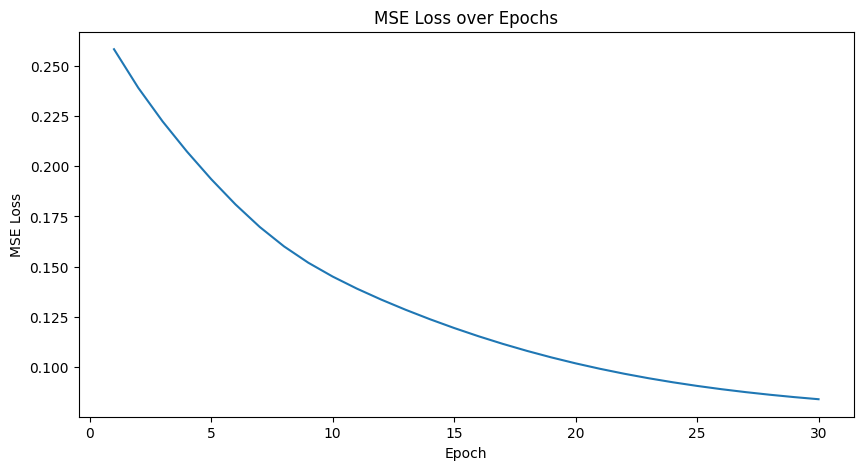

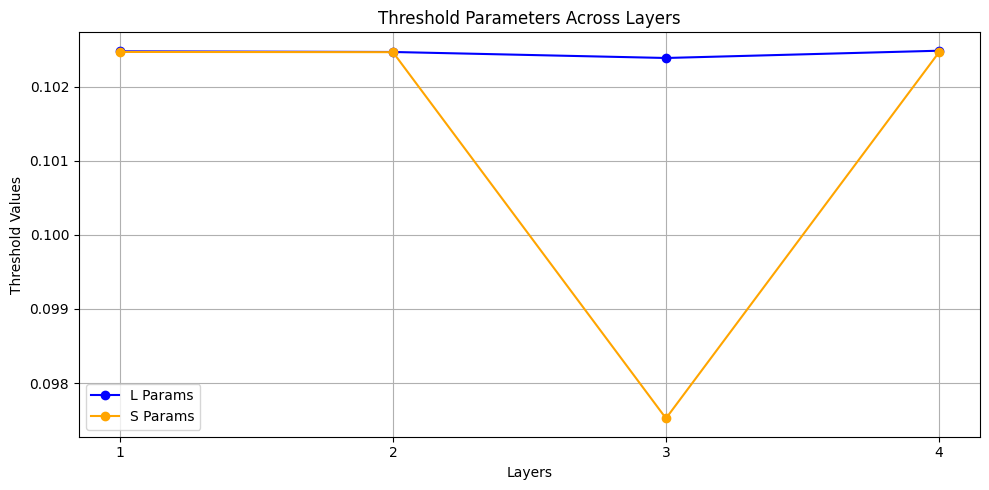

In [34]:
# Model and training configurations
# configs = {
#     "num_layers": 4,
#     "kernel_size": 3,
#     "lr": 1e-4,
#     "epochs": 30,
#     "batch_size": 32,
#     "device": "cuda" if torch.cuda.is_available() else "cpu"
# }
configs = {
    "num_layers": 4,
    "kernel_size": 3,
    "lr": 1e-4,
    "epochs": 30,
    "batch_size": 32,
    "device": "mps" if torch.backends.mps.is_available() else "cpu"  # Use "mps" for Mac M2
}

# Initialize the model, optimizer, and datasets
model = UnfoldedDNN(configs).to(configs["device"])
optimizer = Adam(model.parameters(), lr=configs["lr"])

# Train the model
train(model, train_loader, loss_fn, optimizer, configs)

Plot for random frame in 0


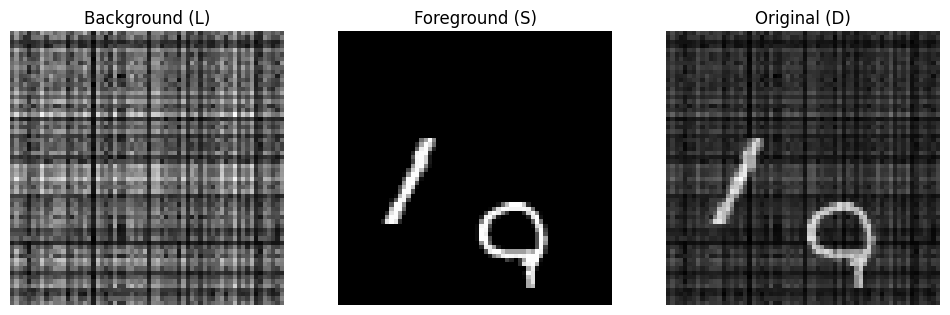

Plot for random frame in 1


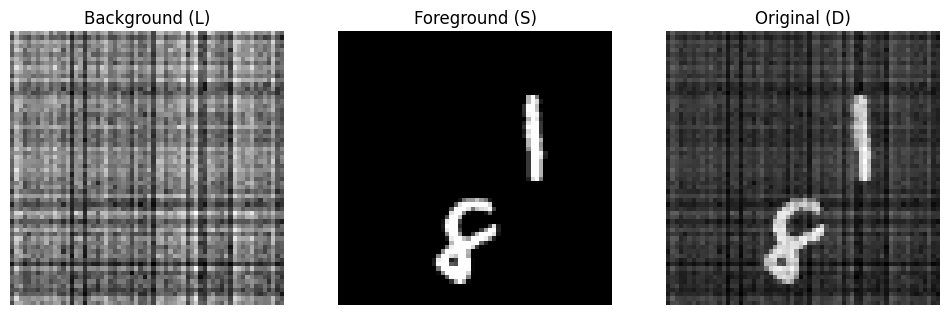

Plot for random frame in 2


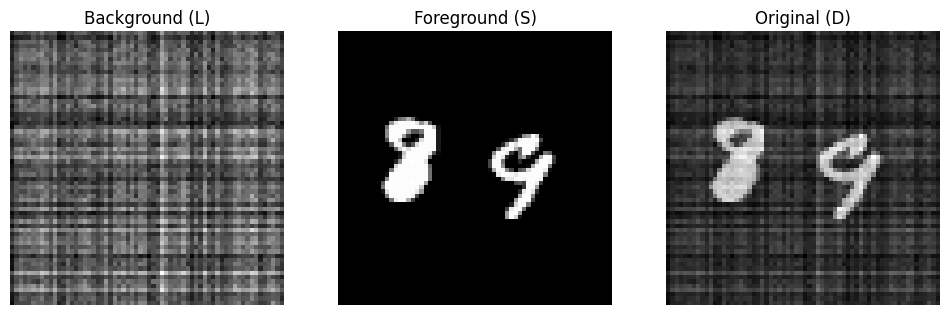

Plot for random frame in 3


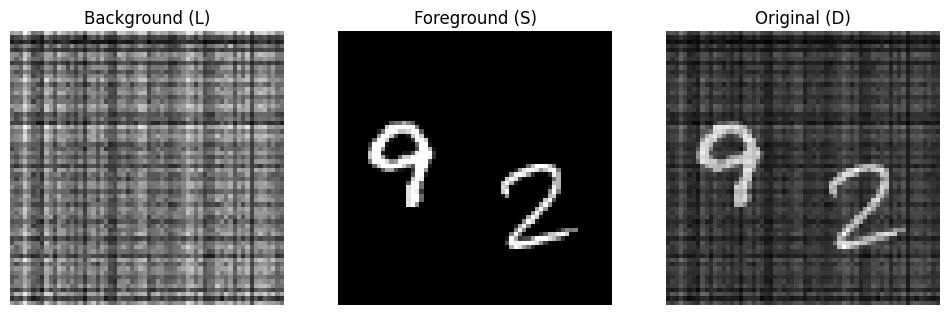

Plot for random frame in 4


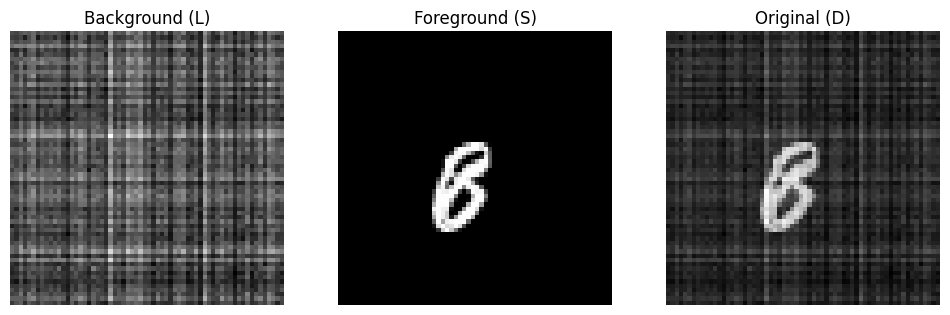

Plot for random frame in 5


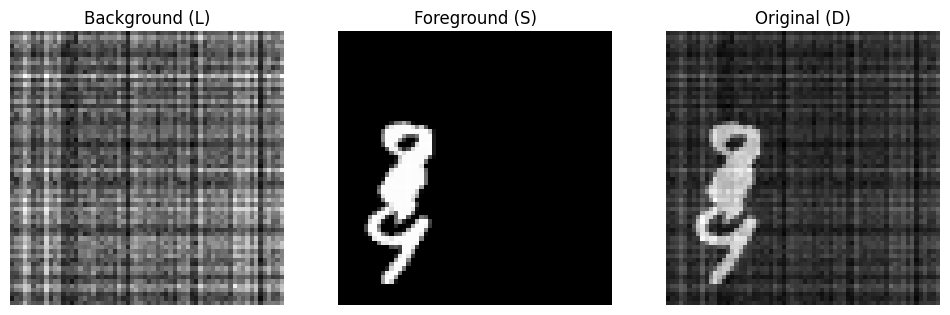

Plot for random frame in 6


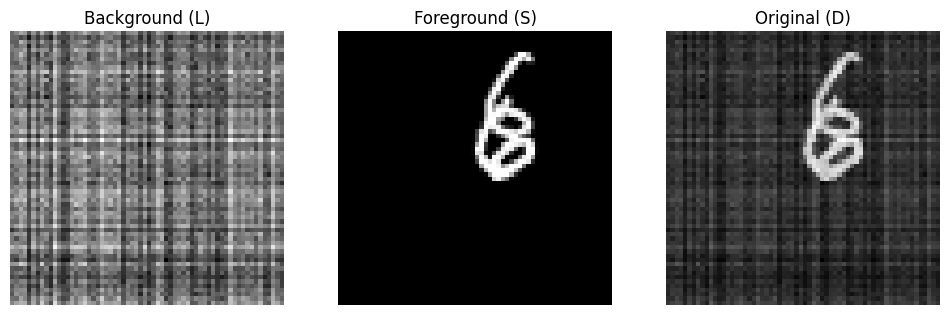

Test Loss: 0.0834


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (7, 4) + inhomogeneous part.

In [35]:
# Evaluate the model
evaluate(model, test_loader, loss_fn, configs)

# Task 5: RPCA with Mixed Norms

Add your solution to this task from the manual in the cells below.